In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("cleaned_day2.csv")
df.head()


,Id,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Inflight_wifi_service,Departure/arrival_time_convenient,Ease_of_online_booking,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Satisfaction,Is_delayed,Age_group
0,19556,Female,Loyal customer,52,Business travel,Eco,160,5,4,3,...,5,5,2,5,5,30.0,32.5,Satisfied,1,Middle Age
1,90035,Female,Loyal customer,36,Business travel,Business,2863,1,1,3,...,4,4,3,4,5,0.0,0.0,Satisfied,0,Adult
2,12360,Male,Disloyal customer,20,Business travel,Eco,192,2,0,2,...,1,3,2,2,2,0.0,0.0,Neutral or dissatisfied,0,Young
3,77959,Male,Loyal customer,44,Business travel,Business,3377,0,0,0,...,1,1,3,1,4,0.0,6.0,Satisfied,0,Middle Age
4,36875,Female,Loyal customer,49,Business travel,Eco,1182,2,3,4,...,2,2,4,2,4,0.0,20.0,Satisfied,0,Middle Age


## **UNIVARIATE ANALYSIS**

## Numerical Analysis
- Age Distribution

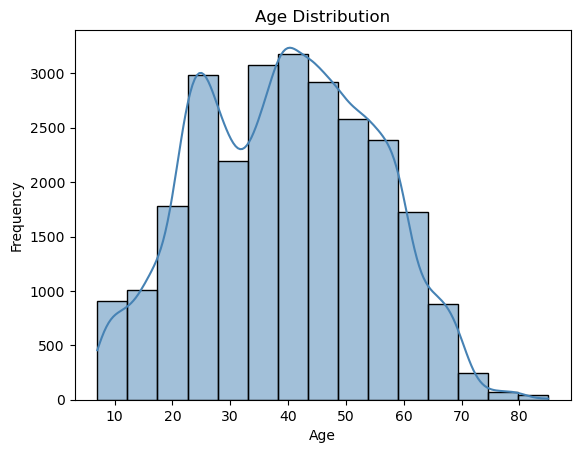

In [13]:
sns.histplot(data=df, x="Age", bins=15, kde=True, color="steelblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\age_distribution.png")
plt.show()


In [4]:
df["Age"].min()

7

## Findings:

- The **age** distribution is **slightly right-skewed.**
- The **majority** of passengers fall **between 25 and 50 years.**
- Very **few** passengers are **above 70.**

## Insights:

- The airline’s core customer base consists of **working-age adults.**
- **Senior passengers (>65)** represent a small segment and may require **targeted service strategies.**
- **Marketing and service design** should focus primarily on **middle-aged travelers.**

- **Travel dstribution**

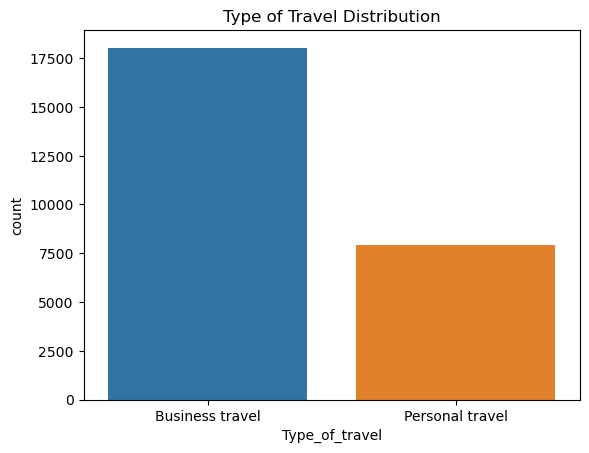

In [18]:
sns.countplot(data=df, x="Type_of_travel", hue="Type_of_travel", legend=False)
plt.title("Type of Travel Distribution")
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\travel_distribution.png")
plt.show()


## Findings:

- **Business travel** constitutes the **majority segment** in the dataset.
- Personal travel accounts for a noticeably smaller share.
- The distribution is **moderately imbalanced toward business passengers.**

## Insights:

- **Revenue stability** may be strongly tied to corporate or work-related travel demand.
- **Seasonal or economic fluctuations affecting business travel** could significantly impact overall passenger volume.
- Service strategies such as **loyalty programs, corporate partnerships, and priority services** may be critical for maintaining competitive advantage.
- **Marketing efforts** could be expanded to grow the personal travel segment for diversification.

- **Average service rating**

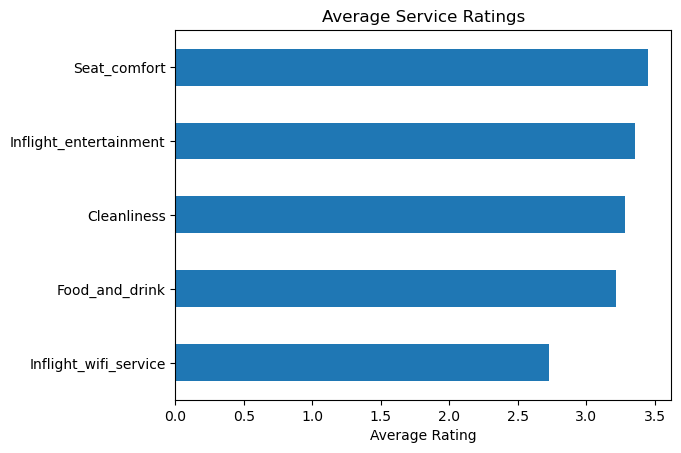

In [19]:
service_cols = [
    "Inflight_wifi_service",
    "Seat_comfort",
    "Food_and_drink",
    "Cleanliness",
    "Inflight_entertainment"
]

avg_ratings = df[service_cols].mean().sort_values()

avg_ratings.plot(kind="barh")
plt.title("Average Service Ratings")
plt.xlabel("Average Rating")
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\age service distribution.png")
plt.show()


**Findings:**

- **Seat comfort** has the highest average rating among all service attributes.
- **Inflight entertainment and cleanliness** follow closely behind.
- Food and drink receives moderate ratings.
- **Inflight WiFi service** has the **lowest** average rating.
- All services are clustered between roughly **2.7 and 3.5,** indicating moderate satisfaction overall.

**Insights:**

- **Cabin comfort** is the airline’s strongest service dimension and likely contributes positively to overall passenger experience.
- **WiFi appears to be the weakest-performing service** and may represent the largest opportunity for improvement.
- Since service ratings are tightly clustered, incremental **improvements in lower-rated areas (like WiFi)** could significantly **shift overall satisfaction.**
- **Operational investments** should prioritize **improving digital connectivity** to enhance competitive positioning.

- **Departure Delay Distribution**

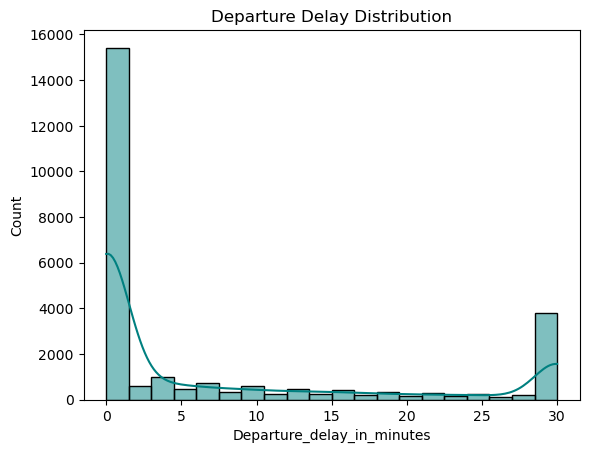

In [5]:
sns.histplot(data=df, x="Departure_delay_in_minutes", bins=20, kde=True, color="teal")
plt.title("Departure Delay Distribution")
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\departure delay_distribution.png")
plt.show()


**Findings:**

- The distribution is heavily **right-skewed.**
- A large proportion of flights depart with **zero or minimal delay (0–2 minutes).**
- **Delay frequency decreases** sharply as delay time increases.
- There is a **noticeable concentration around 30 minutes,** suggesting possible delay capping or operational clustering.

**Insights:**

- The airline demonstrates **strong departure punctuality**, with most flights operating on schedule.
- **Operational efficiency** appears effective in **minimizing small delays.**
- The spike near 30 minutes may indicate a **threshold effect, recovery limitation, or reporting cap.**
- **Preventing moderate delays** (10–20 minutes) could significantly **improve perceived reliability and customer satisfaction.**

## **Categorical Analysis**

- Travel Class Frequency

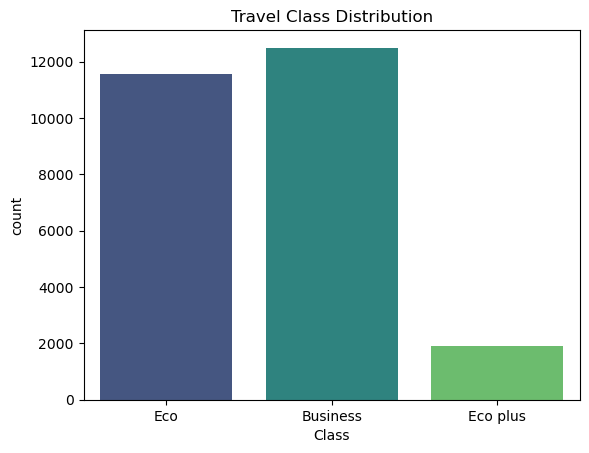

In [20]:

sns.countplot(data=df, x="Class",hue="Class", palette="viridis")
plt.title("Travel Class Distribution")
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\travel cless_distribution.png")
plt.show()


**Findings:**

- Business class has the highest number of passengers.
- Economy (Eco) class follows closely behind Business class.
- Eco Plus represents a significantly smaller portion of the dataset.
- The distribution is moderately imbalanced toward Business and Economy classes.

**Insights:**

- The airline’s primary passenger base consists of Business and Economy travelers.
- Operational decisions and service improvements in these two segments will impact the majority of customers.
- Eco Plus appears to be a niche segment, possibly representing a premium upgrade option.
- Revenue and satisfaction strategies should prioritize Business and Economy classes due to their higher passenger volume.

- Satisfaction Distribution

## **BIVARIATE ANALYSIS**

## Numeric–Categorical

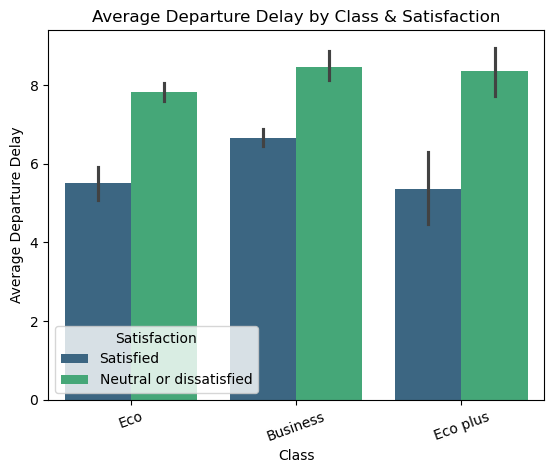

In [21]:
sns.barplot(
    data=df,
    x="Class",
    y="Departure_delay_in_minutes",
    hue="Satisfaction",
    palette="viridis"
)

plt.title("Average Departure Delay by Class & Satisfaction")
plt.ylabel("Average Departure Delay")
plt.xticks(rotation=20)
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\average departure delay by class & statisgfaction.png")
plt.show()


**Findings:**

- Passengers who are not satisfied have higher departure delays.
- Satisfied passengers experience shorter delays.
- This pattern is the same in all travel classes.

**Insight:**

- Departure delay clearly affects passenger satisfaction.
- Reducing delays can directly improve customer happiness.
- On-time performance is important for all classes.

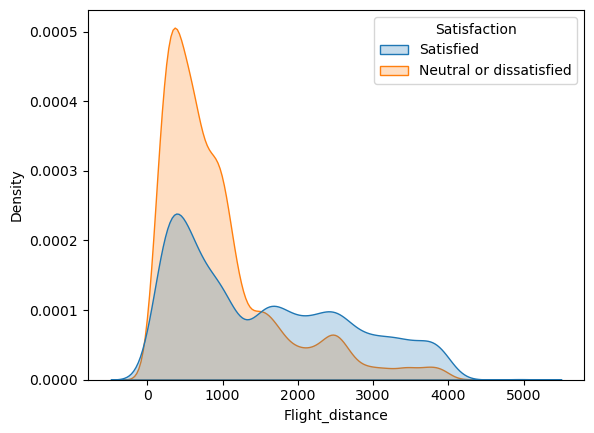

In [22]:
sns.kdeplot(data=df, x="Flight_distance", hue="Satisfaction", fill=True)
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\satisfaction density.png")


**Findings:**

- Short-distance flights have more dissatisfied passengers.
- As flight distance increases, satisfaction increases.
- Long-distance flights show a higher number of satisfied passengers.

**Insight:**

- Passengers on longer flights are generally more satisfied.
- Short flights may need service improvement.
- Improving short-haul experience could increase overall satisfaction.

**- Impact of delay on satisfaction**

C:\Users\HP\AppData\Local\Temp\ipykernel_15696\862570884.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


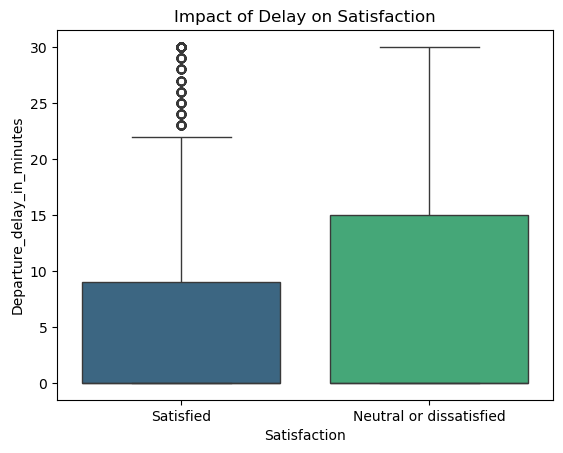

In [23]:
sns.boxplot(data=df,
            x="Satisfaction",
            y="Departure_delay_in_minutes",
            palette="viridis")
plt.title("Impact of Delay on Satisfaction")
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\impact of delay on satisfaction.png")
plt.show()


**Findings:**

- Satisfied passengers have lower departure delays.
- Dissatisfied passengers experience higher delays.
- The delay spread is wider for dissatisfied passengers.

**Insight:**

- Higher departure delays lead to lower satisfaction.
- On-time performance strongly affects passenger happiness.
- Reducing delays can directly improve satisfaction levels.

C:\Users\HP\AppData\Local\Temp\ipykernel_15696\1290203293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


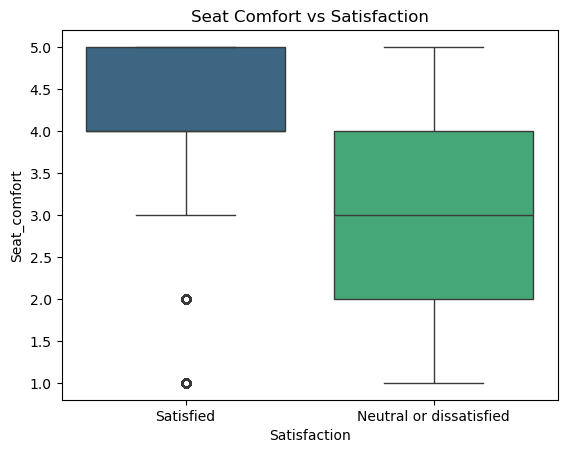

In [28]:
sns.boxplot(data=df,
            x="Satisfaction",
            y="Seat_comfort",
            palette="viridis")
plt.title("Seat Comfort vs Satisfaction")
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\seat comfort vs satisfaction.png")
plt.show()


**Findings:**

- Satisfied passengers give higher seat comfort ratings.
- Dissatisfied passengers give lower seat comfort ratings.
- There is a clear difference between the two groups.

**Insight:**

- Seat comfort strongly affects passenger satisfaction.
- Better seating experience leads to happier passengers.
- Improving seat comfort can increase overall satisfaction.

## **Segment Analysis**

- satisfaction rate by age group

C:\Users\HP\AppData\Local\Temp\ipykernel_15696\603381245.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('Age_group')['Satisfaction']\
C:\Users\HP\AppData\Local\Temp\ipykernel_15696\603381245.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_stats,


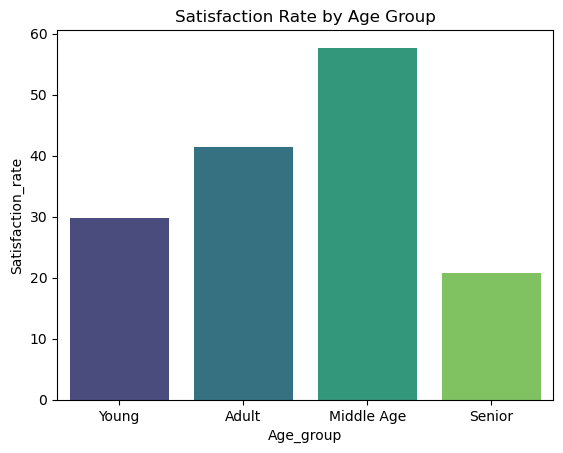

In [25]:
bins = [0, 25, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle Age', 'Senior']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_stats = df.groupby('Age_group')['Satisfaction']\
              .apply(lambda x: (x == 'Satisfied').mean()*100)\
              .reset_index(name='Satisfaction_rate')

sns.barplot(data=age_stats,
            x='Age_group',
            y='Satisfaction_rate',
            palette='viridis')

plt.title("Satisfaction Rate by Age Group")
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\satisfaction rate by age group.png")
plt.show()


**Findings:**

- Middle-aged passengers have the highest satisfaction rate.
- **Adults** show **moderate satisfaction.**
- Young passengers have lower satisfaction than adults.
- **Seniors** have the **lowest satisfaction rate.**

**Insight:**

- Satisfaction levels vary by age group.
- **Middle-aged** passengers are the **most satisfied segment.**
- Senior passengers may **need better service attention**.
- **Age-based service improvements** could increase overall satisfaction.

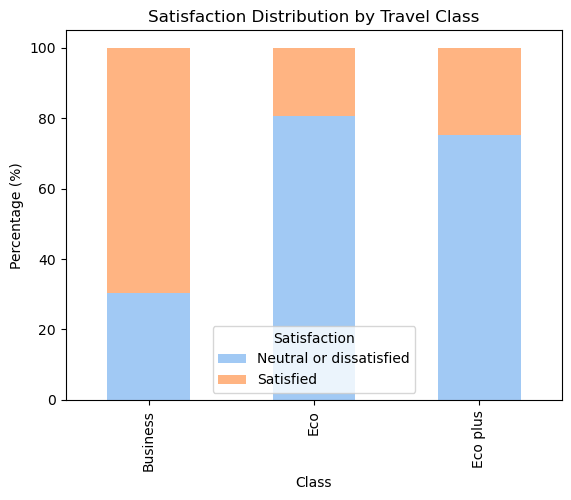

In [26]:
class_dist = pd.crosstab(df['Class'], df['Satisfaction'], normalize='index') * 100

class_dist.plot(kind='bar', stacked=True,color=sns.color_palette('pastel'))

plt.title("Satisfaction Distribution by Travel Class")
plt.ylabel("Percentage (%)")
plt.legend(title="Satisfaction")
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\eda project\reports\figures\satisfaction distribution by travel class.png")
plt.show()


**Findings:**

- **Business class** has the **highest percentage** of satisfied passengers.
- Eco class has the **lowest satisfaction** percentage.
- Eco Plus is in between Business and Eco.
- **Dissatisfaction** is highest in Economy class.

**Insight:**

- **Travel class** affects passenger satisfaction.
- Business class passengers are generally happier.
- Economy class may **need service improvements** to increase satisfaction.
- **Upgrading service quality** in Eco class could significantly improve overall satisfaction.

In [6]:
df.to_csv("cleaned_day3.csv", index=False)
